In [3]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D,Input, Dense, Flatten,Conv2D,Dropout
from tensorflow.keras.optimizers import SGD

In [4]:
image_dir = "./Rice_Seed_Dataset"

In [5]:
pip install split_folders

Note: you may need to restart the kernel to use updated packages.


In [6]:
import splitfolders  # To split the data

In [7]:
# spliting data into training,test and validation data sets
splitfolders.ratio(image_dir,output="output",seed=1337,ratio = (0.8,0.1,0.1))

Copying files: 1007 files [00:03, 292.26 files/s]


In [8]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range = 10,
    horizontal_flip =True,
    vertical_flip = True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    'output/train',
    target_size = (256,256),
    batch_size = 32,
    class_mode ='binary')


Found 804 images belonging to 2 classes.


In [9]:
valid_datagen = ImageDataGenerator(
    rescale= 1./255)

valid_generator = valid_datagen.flow_from_directory(
    'output/val',
    target_size = (256,256),
    batch_size = 32,
    class_mode ='binary')

Found 100 images belonging to 2 classes.


In [10]:
test_datagen = ImageDataGenerator(
    rescale= 1./255)

test_generator = test_datagen.flow_from_directory(
    'output/test',
    target_size = (256,256),
    batch_size = 32,
    class_mode ='binary',
    shuffle=False)


Found 103 images belonging to 2 classes.


In [11]:
model= Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation ="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=5,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=5,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=1,activation="sigmoid"))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer="adam", 
              metrics=[
            tf.keras.metrics.AUC(curve="PR"),
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall(),
            tf.keras.metrics.BinaryAccuracy()]
             )

history=model.fit(
    train_generator,
    steps_per_epoch=25,
    batch_size=32,
    validation_data=valid_generator,
    validation_steps=3,
    epochs=10,
    verbose=1) 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1

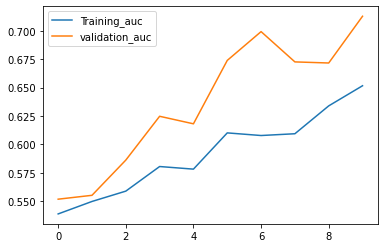

In [61]:
train_auc = history.history['auc_9']
val_auc = history.history['val_auc_9']
plt.plot(train_auc)
plt.plot(val_auc)
plt.legend(['Training_auc','validation_auc'],loc='upper left')

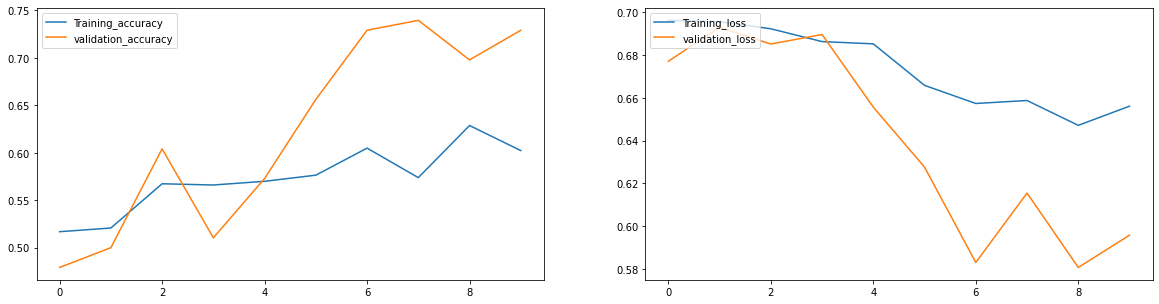

In [62]:
train_binary_accuracy = history.history['binary_accuracy']
val_binary_accuracy = history.history['val_binary_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(train_binary_accuracy)
plt.plot(val_binary_accuracy)
plt.legend(['Training_accuracy','validation_accuracy'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Training_loss','validation_loss'],loc='upper left')



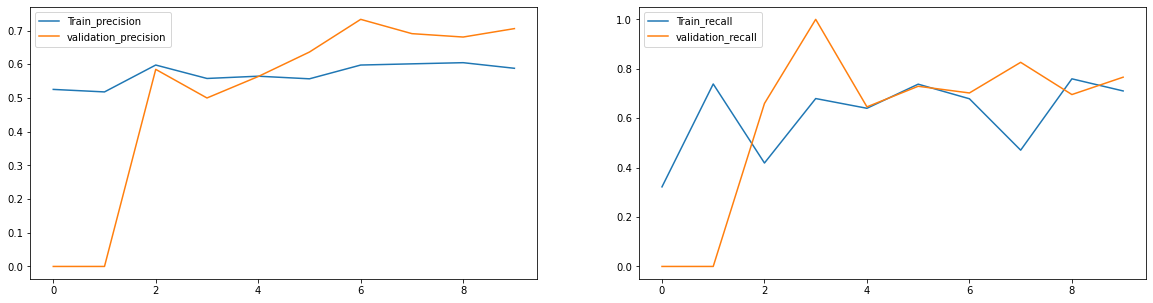

In [64]:
train_precision =history.history['precision_9']
train_recall = history.history['recall_9']
val_precision = history.history['val_precision_9']
val_recall = history.history['val_recall_9']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(train_precision)
plt.plot(val_precision)
plt.legend(['Train_precision','validation_precision'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(train_recall)
plt.plot(val_recall)
plt.legend(['Train_recall','validation_recall'],loc='upper left')

In [66]:
scores = model.evaluate(test_generator)
scores

4/4 [==============================] - 7s 2s/step - loss: 0.6451 - auc_9: 0.6297 - precision_9: 0.5283 - recall_9: 0.5385 - binary_accuracy: 0.5243   


[0.6451268792152405,
 0.6296830177307129,
 0.5283018946647644,
 0.5384615659713745,
 0.5242718458175659]

In [1]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


In [12]:
import visualkeras


visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show